# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import logging
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Perform a weather check on each city using a series of successful API calls.
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create list of variable values
city_name1 = []
cloudy_percent1 = []
country_name1 = []
date1 = []
humidity1 = []
lat1 = []
lng1 = []
max_temp1 = []
wind_speed1 = []

#record number
n = 0

#begin printing log of each city as it's being processed
print("Beginning Data Retrieval")
print("---------------------------")

# Build query URL
for city in cities:
    
    #api request for each city
    response = requests.get(url + "appid=" + api_key + "&units=IMPERIAL" + "metric" + "&q=" + city).json()
    
    #assign variable to variable name
    if response['cod'] == 200:
        n += 1
        city_name = response['name']
        cloudy_percent = response['clouds']['all']
        country_name = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        max_temp = response['main']['temp_max']
        wind_speed = response['wind']['speed']
        
        #print log for each city that is available
        print(f"Processing Record {n} of Set 1 | {city_name}")
        
    elif response['cod'] != 200:
        #print log for each city that's not available
        print("City not found. Skipping...")

    #append variable values to lists
    city_name1.append(city_name)
    cloudy_percent1.append(cloudy_percent)
    country_name1.append(country_name)
    date1.append(date)
    humidity1.append(humidity)
    lat1.append(lat)
    lng1.append(lng)
    max_temp1.append(max_temp)
    wind_speed1.append(wind_speed)
    
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | Hobart
Processing Record 2 of Set 1 | Longyearbyen
Processing Record 3 of Set 1 | San Patricio
Processing Record 4 of Set 1 | Hithadhoo
Processing Record 5 of Set 1 | Yatou
Processing Record 6 of Set 1 | Lebu
Processing Record 7 of Set 1 | Busselton
Processing Record 8 of Set 1 | Shingu
City not found. Skipping...
Processing Record 9 of Set 1 | Punta Arenas
Processing Record 10 of Set 1 | Ushuaia
Processing Record 11 of Set 1 | Bonavista
Processing Record 12 of Set 1 | Butaritari
City not found. Skipping...
Processing Record 13 of Set 1 | Sheopur
Processing Record 14 of Set 1 | Severo-Kurilsk
Processing Record 15 of Set 1 | Witu
Processing Record 16 of Set 1 | Lake City
Processing Record 17 of Set 1 | Aldan
Processing Record 18 of Set 1 | Chuy
Processing Record 19 of Set 1 | Colesberg
Processing Record 20 of Set 1 | Khatanga
Processing Record 21 of Set 1 | Leningradskiy
Processing Record 22 of Set 1 | B

Processing Record 181 of Set 1 | Lata
City not found. Skipping...
Processing Record 182 of Set 1 | Yulara
Processing Record 183 of Set 1 | Alofi
Processing Record 184 of Set 1 | Dingle
Processing Record 185 of Set 1 | Iqaluit
Processing Record 186 of Set 1 | Viedma
Processing Record 187 of Set 1 | Sydney Mines
Processing Record 188 of Set 1 | Port-Cartier
City not found. Skipping...
City not found. Skipping...
Processing Record 189 of Set 1 | Kachiry
City not found. Skipping...
Processing Record 190 of Set 1 | Loa Janan
City not found. Skipping...
Processing Record 191 of Set 1 | Honiara
City not found. Skipping...
City not found. Skipping...
Processing Record 192 of Set 1 | Osmanabad
Processing Record 193 of Set 1 | Vila Franca do Campo
Processing Record 194 of Set 1 | Grindavik
Processing Record 195 of Set 1 | Biltine
Processing Record 196 of Set 1 | Sitka
Processing Record 197 of Set 1 | Te Anau
Processing Record 198 of Set 1 | Pinawa
Processing Record 199 of Set 1 | Srednekolymsk
P

Processing Record 362 of Set 1 | Mayor Pablo Lagerenza
Processing Record 363 of Set 1 | Meadow Lake
Processing Record 364 of Set 1 | Rantepao
City not found. Skipping...
Processing Record 365 of Set 1 | Coquimbo
Processing Record 366 of Set 1 | Teacapan
Processing Record 367 of Set 1 | Mancora
Processing Record 368 of Set 1 | Puntarenas
Processing Record 369 of Set 1 | Maketu
Processing Record 370 of Set 1 | Kargil
Processing Record 371 of Set 1 | Aklavik
Processing Record 372 of Set 1 | Umea
Processing Record 373 of Set 1 | Santa Cruz Cabralia
Processing Record 374 of Set 1 | Vung Tau
Processing Record 375 of Set 1 | Haines Junction
Processing Record 376 of Set 1 | Tete
Processing Record 377 of Set 1 | Shenjiamen
Processing Record 378 of Set 1 | Meulaboh
Processing Record 379 of Set 1 | Kabanjahe
Processing Record 380 of Set 1 | Trelew
Processing Record 381 of Set 1 | Faya
Processing Record 382 of Set 1 | Comodoro Rivadavia
Processing Record 383 of Set 1 | Sao Joao da Barra
Processing

Processing Record 547 of Set 1 | Chota
Processing Record 548 of Set 1 | Baixa Grande
Processing Record 549 of Set 1 | Maun
Processing Record 550 of Set 1 | Esil
Processing Record 551 of Set 1 | Jalingo
Processing Record 552 of Set 1 | Cayenne
Processing Record 553 of Set 1 | Dmitriyevskoye
Processing Record 554 of Set 1 | Sorland
Processing Record 555 of Set 1 | Sanguem
City not found. Skipping...
Processing Record 556 of Set 1 | Guane
City not found. Skipping...
Processing Record 557 of Set 1 | Stepnogorsk
Processing Record 558 of Set 1 | Presidencia Roque Saenz Pena
Processing Record 559 of Set 1 | Marsa Matruh
Processing Record 560 of Set 1 | Maniitsoq
---------------------------
Data Retrieval Complete
---------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create data frame
city_data = pd.DataFrame({'City': city_name1,
                          'Cloudiness': cloudy_percent1,
                          'Country': country_name1,
                          'Date': date1,
                          'Humidity': humidity1,
                          'Latitude': lat1,
                          'Longitude': lng1,
                          'Maximum Temperature': max_temp1,
                          'Wind Speed': wind_speed1})

In [5]:
#display first five rows
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Maximum Temperature,Wind Speed
0,Hobart,20,AU,1546896600,59,-42.88,147.33,291.150,3.60
1,Longyearbyen,40,NO,1546897800,68,78.22,15.63,269.150,18.50
2,San Patricio,88,PY,1546898744,91,-26.98,-56.83,299.454,2.21
3,Hithadhoo,64,MV,1546898741,100,-0.60,73.08,300.579,3.06
4,Yatou,40,CM,1546894800,88,3.63,9.81,300.150,0.50


In [6]:
city_data.to_csv("Weather_Data.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

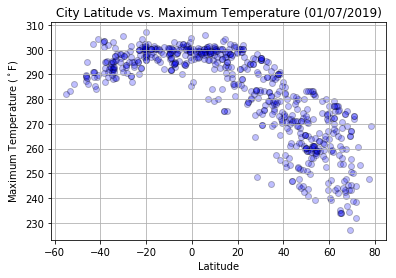

In [15]:
plt.scatter(city_data['Latitude'],city_data['Maximum Temperature'], marker = "o",
            facecolors = "blue", edgecolors = "black", alpha = 0.25)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature ($^\circ$F)")
plt.title('City Latitude vs. Maximum Temperature (01/07/2019)')
plt.savefig("lat_temp.png")
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

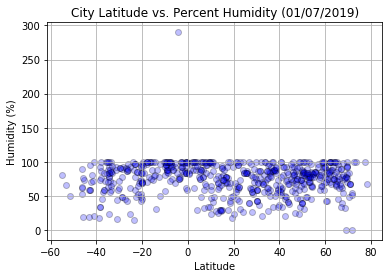

In [16]:
plt.scatter(city_data['Latitude'],city_data['Humidity'], marker = "o",
            facecolors = "blue", edgecolors = "black", alpha = 0.25)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('City Latitude vs. Percent Humidity (01/07/2019)')
plt.savefig("lat_humidity.png")
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

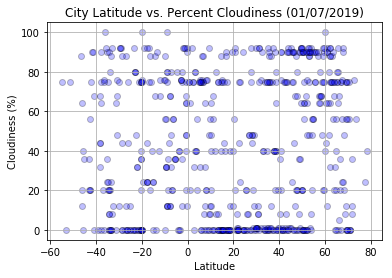

In [17]:
plt.scatter(city_data['Latitude'],city_data['Cloudiness'], marker = "o",
            facecolors = "blue", edgecolors = "black", alpha = 0.25)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('City Latitude vs. Percent Cloudiness (01/07/2019)')
plt.savefig("lat_cloudiness.png")
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

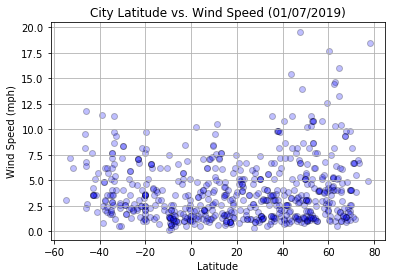

In [18]:
plt.scatter(city_data['Latitude'],city_data['Wind Speed'], marker = "o",
            facecolors = "blue", edgecolors = "black", alpha = 0.25)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('City Latitude vs. Wind Speed (01/07/2019)')
plt.savefig("lat_wind.png")
plt.show

In [1]:
## 3 Observations ##
# 1. There seems to be a correlation between latitude and maximum temperature. As latitude gets closer to 0, maximum temperature increases. 
# 2. There seems to be no significant relationships between latitude and other tested variables such as wind speed, percent cloudiness, or percent humidity.
# 3. Independent of latitude, wind speed seems to cluster mostly between 0.0 and 2.5 mph. 
## Within the "Latitude vs. Percent Humidity" plot, there is one city with humidity at 300%. I believe this is an error and has skewed the output of the scatterplot.##